[ WARN:0@0.526] global loadsave.cpp:244 findDecoder imread_('nothealthy.jpg'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

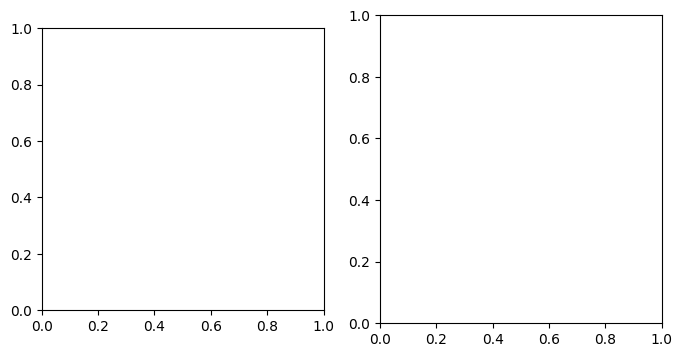

In [1]:
import cv2
import matplotlib.pyplot as plt
# Load the image
im = cv2.imread('nothealthy.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Otsu's method
_, thresh = cv2.threshold(im, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original image and the thresholded image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(im, cmap='gray')
ax1.axis('off')
ax2.imshow(thresh, cmap='gray')
ax2.axis('off')
plt.show()

In [3]:
import cv2

# Load image in grayscale
img = cv2.imread('nothealthy.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Otsu's thresholding
thresh_val, img_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Display thresholded image
cv2.imshow(img_thresh)

[ WARN:0@12402.562] global loadsave.cpp:244 findDecoder imread_('nothealthy.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [4]:
import cv2

# Load image in grayscale
img = cv2.imread('nothealthy.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Otsu's thresholding
thresh_val, img_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Display thresholded image
cv2.namedWindow('Thresholded Image', cv2.WINDOW_NORMAL)
cv2.imshow('Thresholded Image', img_thresh)

[ WARN:0@12482.037] global loadsave.cpp:244 findDecoder imread_('nothealthy.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.7.0) /io/opencv/modules/highgui/src/window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


[ WARN:0@0.332] global loadsave.cpp:244 findDecoder imread_('nothealthy.jpg'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

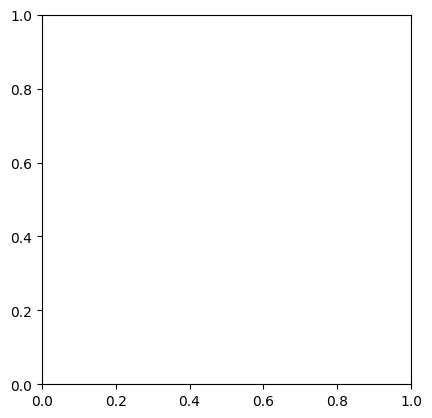

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread('nothealthy.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Otsu's thresholding
thresh_val, img_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Display thresholded image using matplotlib
plt.imshow(img_thresh, cmap='gray')
plt.axis('off')
plt.show()

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread('nothealthy.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Otsu's thresholding
thresh_val, img_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Convert image data to float and display thresholded image using matplotlib
plt.imshow(img_thresh.astype(float), cmap='gray')
plt.axis('off')
plt.show()

[ WARN:0@102.077] global loadsave.cpp:244 findDecoder imread_('nothealthy.jpg'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'astype'

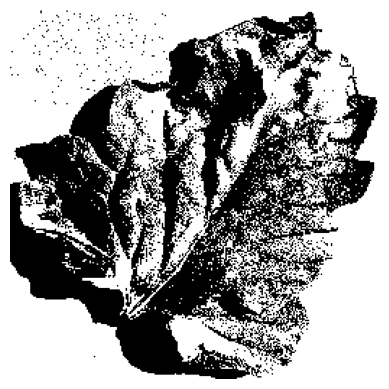

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread('nothealthy.JPG', cv2.IMREAD_GRAYSCALE)

if img is None:
    print('Error: Failed to load image')
else:
    # Apply Otsu's thresholding
    thresh_val, img_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Convert image data to float and display thresholded image using matplotlib
    plt.imshow(img_thresh.astype(float), cmap='gray')
    plt.axis('off')
    plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread('/path/to/image.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
    print('Error: Failed to load image')
else:
    # Apply Otsu's thresholding
    thresh_val, img_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Convert image data to float and display thresholded image using matplotlib
    plt.imshow(img_thresh.astype(float), cmap='gray')
    plt.axis('off')
    plt.show()
